# Inspect PWC Net API

## Set Up Dependencies and the Network

In [2]:
# imports and dependencies
from os.path import join
import skimage.io
from skimage.io import imread
import matplotlib.pyplot as plt
from pwc_net_wrapper import *
import time

In [3]:
# set up test images
img_root_dir = '/home/shared/project/shivam/DAVIS/JPEGImages/480p/kite-walk/'
filenames = [join(img_root_dir, '00000.jpg'), join(img_root_dir, '00001.jpg')]
all_imgs = [imread(img) for img in filenames]
all_imgs = [im[:, :, :3] for im in all_imgs]

In [4]:
# create network
pwc = PWCNetWrapper()

# run once to build/resolve graph
flow = pwc.infer_flow_field(all_imgs[0], all_imgs[1])

/home/shared/project/PWC-Net/pytorch/models/PWCNet.py:128: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data, mode='fan_in')


## Run Timing Tests

In [6]:
n = 100

times = []

for _ in range(n):
    start_time = time.time()
    flow = pwc.infer_flow_field(all_imgs[0], all_imgs[1])
    times.append(time.time() - start_time)
    
print(f'Average Runtime: {sum(times) / n}')

Average Runtime: 0.06451534271240235


## Outputs: Flow Field & Stats

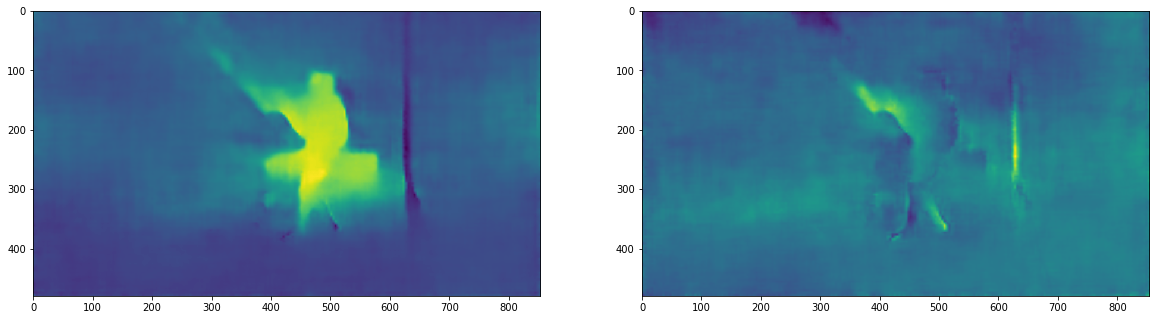

In [7]:
# plot output flow field components
fig, axes = plt.subplots(1, 2, figsize=(20, 40))
axes[0].imshow(flow[...,0])
axes[1].imshow(flow[...,1])

In [8]:
# print stats
print(f'Max: \t{flow.max()}')
print(f'Min: \t{flow.min()}')
print(f'Mean:\t{flow.mean()}')
print(f'Std: \t{flow.std()}')
print(f'\nInput Shape: \t{all_imgs[0].shape}')
print(f'Output Shape:  \t{flow.shape}')

Max: 	5.797389507293701
Min: 	-0.21502840518951416
Mean:	1.4338289499282837
Std: 	0.9271313548088074

Input Shape: 	(480, 854, 3)
Output Shape:  	(480, 854, 2)
